In [14]:
import math
import numpy as np
import time

''' Block Davidson, Joshua Goings (2013)

    Block Davidson method for finding the first few
	lowest eigenvalues of a large, diagonally dominant,
    sparse Hermitian matrix (e.g. Hamiltonian)
'''

n = 2400				# Dimension of matrix
tol = 1e-10				# Convergence tolerance
mmax = n//2				# Maximum number of iterations	

''' Create sparse, diagonally dominant matrix A with 
	diagonal containing 1,2,3,...n. The eigenvalues
    should be very close to these values. You can 
    change the sparsity. A smaller number for sparsity
    increases the diagonal dominance. Larger values
    (e.g. sparsity = 1) create a dense matrix
'''

sparsity = 0.1
A = np.zeros((n,n))
for i in range(0,n):
    A[i,i] = i + 1 
A = A + sparsity*np.random.randn(n,n) 
A = (A.T + A)/2 


def cost_func(x):
    y = A @ x
    li = y / x
    return li


In [15]:
x = np.random.random(n) * 2 - 1


In [16]:
c = cost_func(x)

In [17]:
c.min(), c.max(), c.mean(), c.std()

(-3178.753014200863, 3373.847311575585, 1200.2123801321543, 702.8080782103846)

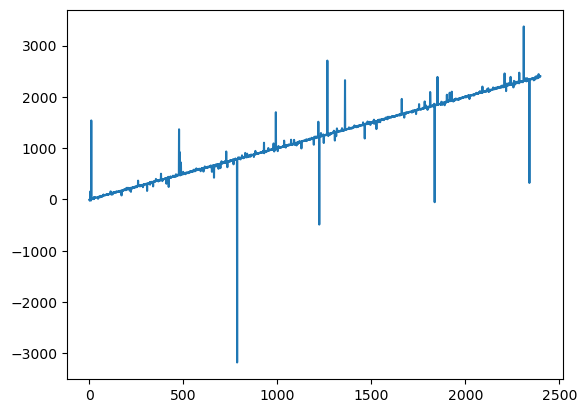

In [18]:
plt.plot(c)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1., 29., 67., 70., 63.,
        66., 63., 64., 64., 67., 69., 66., 60., 64., 64., 72., 60., 71.,
        64., 66., 64., 67., 62., 67., 64., 65., 69., 62., 63., 71., 62.,
        68., 61., 67., 69., 62., 64., 67., 10.,  2.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-3178.7530142 , -3113.22701094, -3047.70100769, -2982.17500443,
        -2916.64900117, -2851.12299791, -2785.59699465, -2720.0709914 ,
        -2654.54498814, -2589.01898488, -2523.49298162, -2457.96697837,
        -2392.44097511, -2326.91497185, -2261.38896859, -2195.86296533,
        -2130.33696208, -2064.81095882, -1999.28495556, -1933.7589523 ,
        -1868.23294905, -1802.70694579, -1737.18094253, -1671.65493927,
  

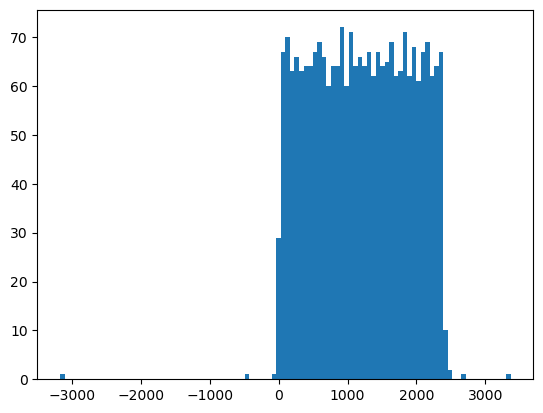

In [20]:
plt.hist(c, bins=100)

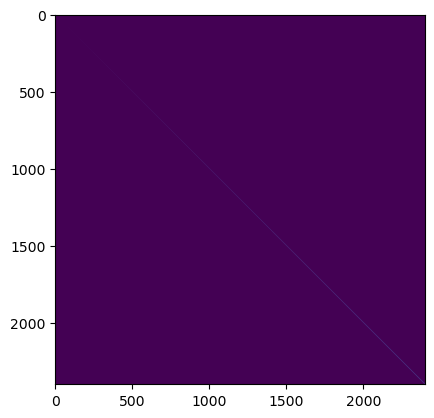

In [13]:
plt.imshow(A)

In [23]:
x1 = np.where(np.abs(c-c.mean()) > 0.5 * c.std(), c.mean()*x, x)

In [24]:
c2 = cost_func(x1)

(array([1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 3.000e+00, 1.300e+01, 2.101e+03, 2.550e+02,
        8.000e+00, 5.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

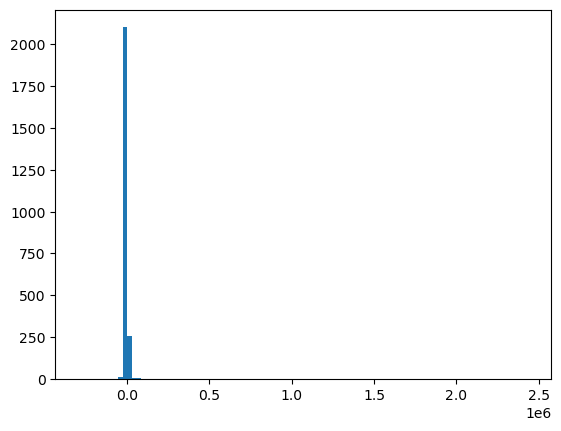

In [26]:
plt.hist(c2, bins=100)

In [27]:
c2.min(), c2.max(), c2.mean(), c2.std()

(-298547.9396025329, 2438629.875122069, 2612.2950970658358, 53639.079627183644)

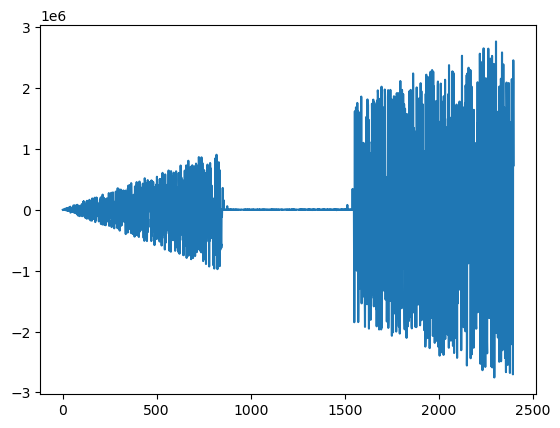

In [30]:
plt.plot(A @ x1)